# Decision Tree C5.0

## Only for Classification not for Regression

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
cols =  ['Sepel length', 'Sepal width', 'Petal length', 'Petal width', 'Class']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None, names= cols)
df


,Sepel length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
x = df.iloc[:,:-1]
y = df['Class']
y =le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size= 0.2, random_state=1)

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt = DecisionTreeClassifier(criterion= 'entropy')

In [16]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [19]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

1.0


0.9666666666666667

[Text(0.4, 0.9166666666666666, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'X[3] <= 1.55\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.25, 'X[0] <= 6.6\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.1\nentropy = 

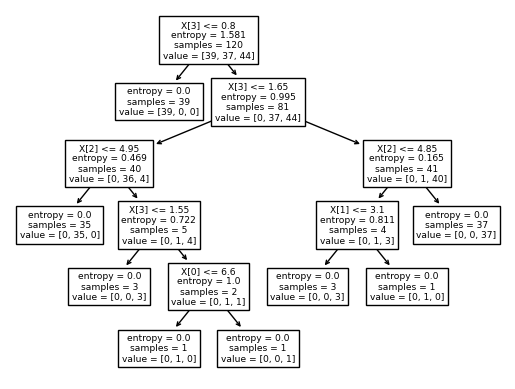

In [20]:
tree.plot_tree(dt)

# root node is selected based on the entropy calculation at backend

In [21]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi']= 250

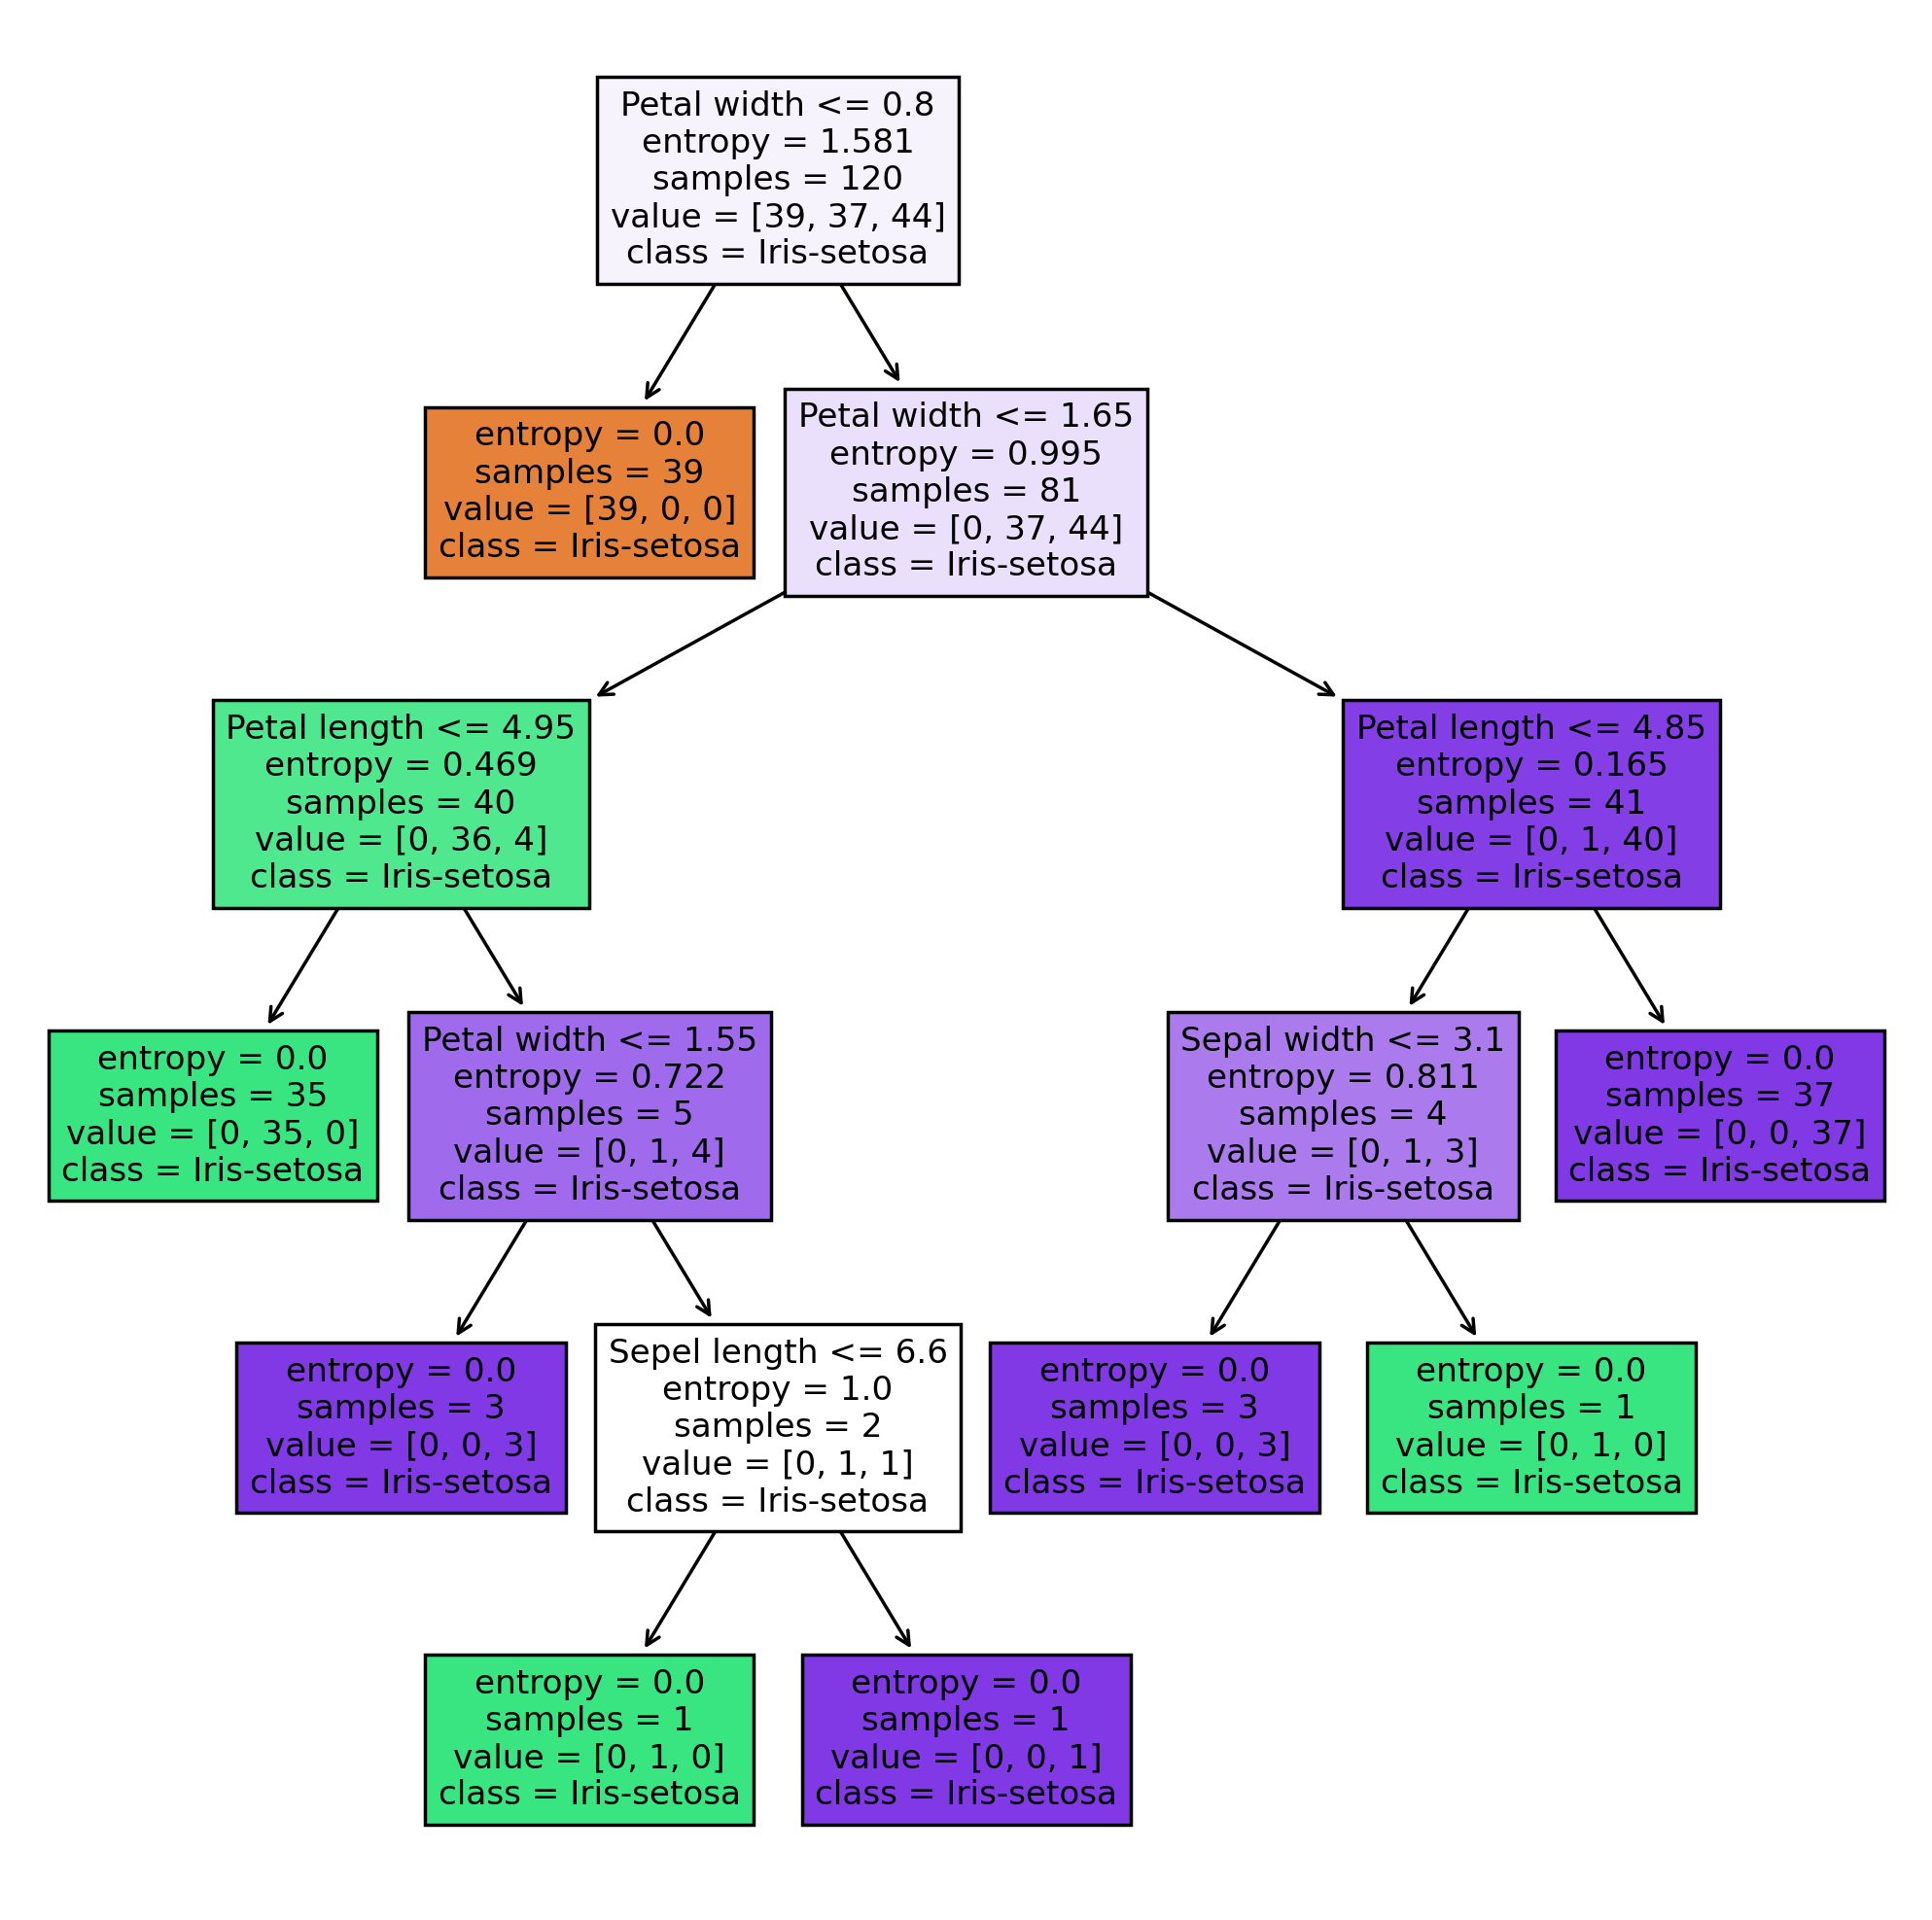

In [22]:
tree.plot_tree(dt, feature_names= x.columns, class_names= df['Class'], filled= True)

plt.show()